In [130]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Name:  Tommy Bojanin


# Instructions

* For math problems, you are _**encouraged**_ to use $\LaTeX,$ however handwritten solutions are also accepted provided that they are __extremely__ tidy and thorough. 
* Please make sure you explain the rationale behind each step -- this is very important because:
   1.  It shows me that you understood each step and that you are not (just) copying from a friend or a solution found online. 
   2.  It helps me understand your approach, I often see you using new approaches that are correct and also different that what I or the author came up with. 
* <font color="red"> **ALSO:**, please **staple** your solutions before submitting them. </font> I will start deducting points for unstapled submissions if this continues to be a problem. Be a good friend and offer to share a stapler with a freind if they need it -- I cannot keep track of a stack of loose paper!

* Pleas make sure <font color=red> all of your code fits on the printed pages</font>, this may require breaking long lines into several shorter ones. I must see your code in order to beleive it is correct. 

# Problems

## Problem 1
4.14 (*) Show that for a linearly separable data set, the maximum likelihood solution
for the logistic regression model is obtained by finding a vector $\mathbf{w}$ whose decision
boundary $\mathbf{w}^T \phi(\mathbf{x}) = 0$ separates the classes and then taking the magnitude of $\mathbf{w}$ to
infinity.  
> **NOTE:** is this a good or a bad thing about the maximum likelihood solution...?

## Problem 2
4.18 (*) Using the result (4.91) for the derivatives of the softmax activation function,
show that the gradients of the cross-entropy error (4.108) are given by (4.109).

# Problem 3
Demonstrate the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) class from sklearn on a *two dimensonal* slice of either:
1. The fisher iris data
2. Data from one of the kaggle competitions

You must:
1. Separate your data into five different _test_ and _training_ sets, using [Stratified Kfold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) cross validation, making sure that you set the parameter to shuffle your data. 
1. For each of the 5 different folds/classifiers:
    1. Show the the way the space is partitioned, e.g. Fig 2.28 or Fig 4.5. 
        1. Include a scatter plot of the training data, using colors to indicate the different target labels. 
        1. Include a scatter plot of the test data using a different marker (e.g. squares), also using different colors to indicate expected labels. 
    1. Use the [Classification Report](http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) and the [Confusion Matrix](http://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix) to present the quality of your classifiers.

You must share code as well as figures. 
Comment on how well you think your classifier will work on a secret test set (e.g. Kaggle's test set)

> **HINT:** I do not expect this to take a large amount of code; most of what I ask is available already in scipy / sklearn

I did this in about 30 minutes and 35 lines of code (other than what I have shared with you).  Here is the output _I_ produced for the first fold. I made use of the `plot_confusion_matrix` function that I have included in this notebook for you to use as well. 

### Fold # 1 (of 5)

<img src="my-soln-plot-fold1.png">
```
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        10
 versicolor       1.00      0.70      0.82        10
  virginica       0.77      1.00      0.87        10

avg / total       0.92      0.90      0.90        30
```
<img src="my-soln-cm-fold1.png">


In [131]:
from sklearn.datasets import load_iris  # or use some other data, that is ok
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt

In [132]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

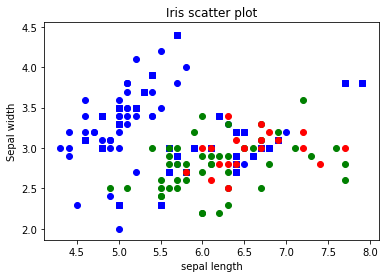

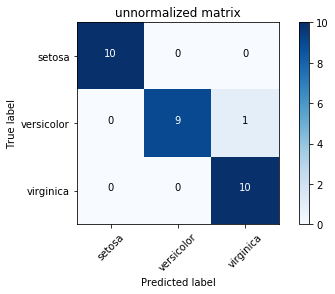

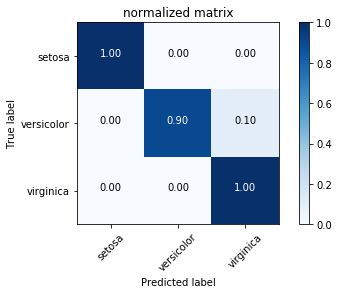

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        10
 versicolor       1.00      0.90      0.95        10
  virginica       0.91      1.00      0.95        10

avg / total       0.97      0.97      0.97        30



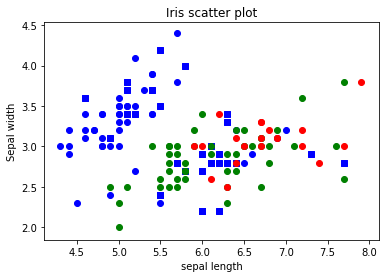

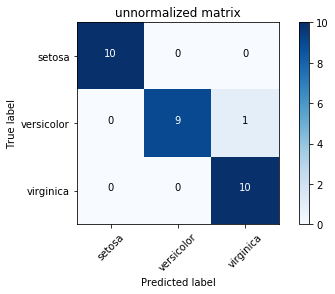

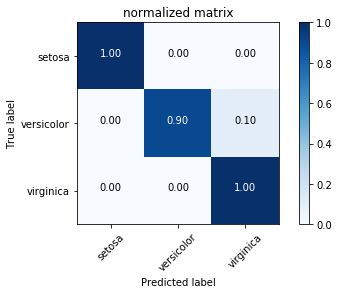

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        10
 versicolor       1.00      0.90      0.95        10
  virginica       0.91      1.00      0.95        10

avg / total       0.97      0.97      0.97        30



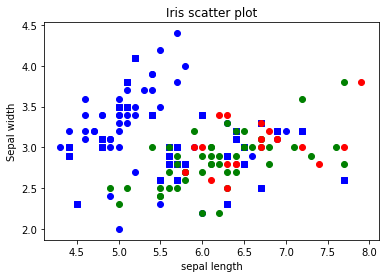

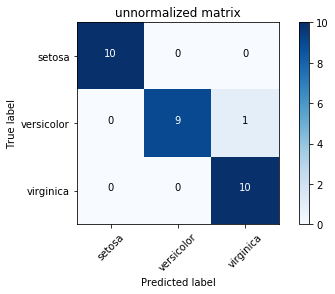

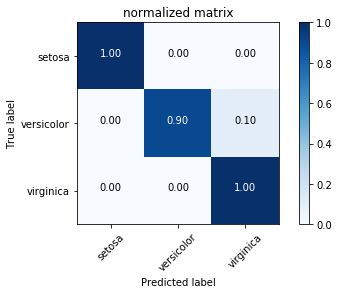

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        10
 versicolor       1.00      0.90      0.95        10
  virginica       0.91      1.00      0.95        10

avg / total       0.97      0.97      0.97        30



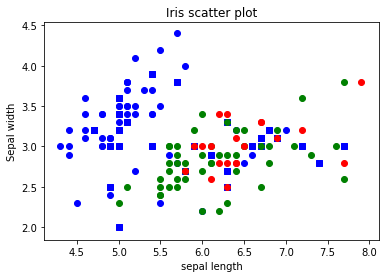

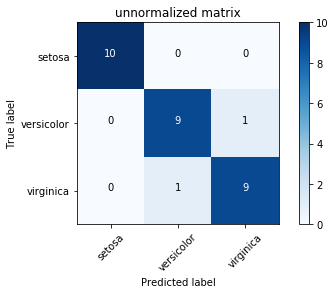

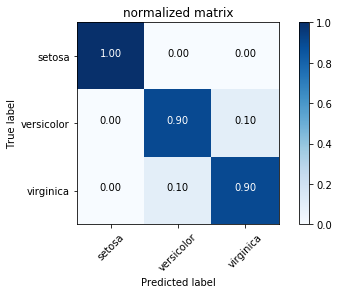

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        10
 versicolor       0.90      0.90      0.90        10
  virginica       0.90      0.90      0.90        10

avg / total       0.93      0.93      0.93        30



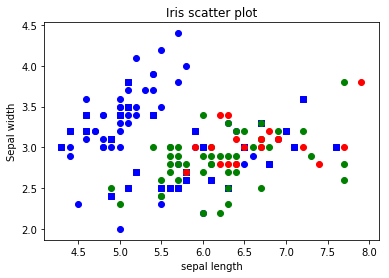

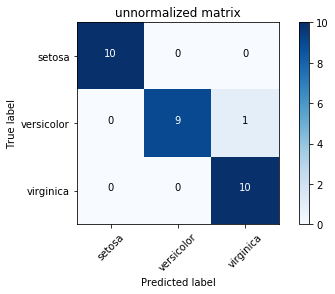

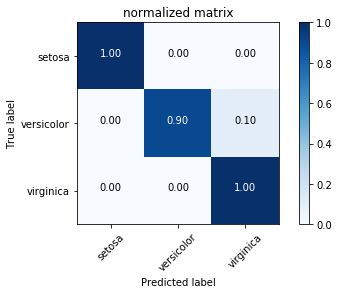

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        10
 versicolor       1.00      0.90      0.95        10
  virginica       0.91      1.00      0.95        10

avg / total       0.97      0.97      0.97        30



In [154]:
iris = load_iris()
X,y = iris.data, iris.target
target_names = iris.target_names


    

    
kfold = StratifiedKFold(n_splits = 5, shuffle = True)

for train_index, test_index in kfold.split(X,y):
    
    #create training and test sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    #add training features
    train_featuresAll=[]
    train_targets = []
    train_features = X_train[: , [0,1,2,3]]
    
    for feature in train_features:
        train_featuresAll.append(feature[0]) 
        train_targets.append(feature[1])
    
    train_data = ((train_featuresAll[:50], train_targets[:50]), (train_featuresAll[50:100], train_targets[50:100]), 
        (train_featuresAll[100:150], train_targets[100:150]))
    
    
    #do the same thing for the test data
    test_targets = []
    test_features = X_test[:, [0,1,2,3]]
    test_featuresAll = []
    
    for feature in test_features:
        test_featuresAll.append(feature[0]) 
        test_targets.append(feature[1])
    
    test_data = ((test_featuresAll[:50], test_targets[:50]), (test_featuresAll[50:100], test_targets[50:100]), 
        (test_featuresAll[100:150], test_targets[100:150]))
    
    #colors and groups for the scatter plots
    groups = ('Iris-setosa','Iris-versicolor','Iris-virginica')
    colors = ('blue', 'green','red')
    
    
    #these two lines mess up my confusion matrix and the classifying report
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)

    
    for test_item, train_item, color, group in zip(test_data,train_data, colors,groups): 
        train_x, train_y = train_item
        test_x, test_y = test_item
        plt.scatter(train_x, train_y,color=color,alpha=1)
        plt.scatter(test_x,test_y,color=color,alpha=1,marker='s')
        plt.title('Iris scatter plot')
    plt.xlabel('sepal length')
    plt.ylabel('Sepal width')
    plt.show()
    
    plot_confusion_matrix(cf_matrix, classes=target_names, title='unnormalized matrix')
    plt.show()
    plot_confusion_matrix(cf_matrix, classes=target_names,normalize = True, title='normalized matrix')
    plt.show()
    print(classification_report(y_test, y_pred, target_names=target_names))
    


